# INTRODUCTION

### GOAL

Provided a bitcoin address with features pertaining to that address, we are challenged to predict if that address has been used to recieve ransoms in the past.

### DETECTION

For this project we will be using a dataset from UCI(University of California, Irvine) Machine Learning repository. This data set consists of labelled data with 10 attributes and target class to determine if the address is white or it belongs to a class of ransomware.
The link to dataset-https://archive.ics.uci.edu/ml/datasets/BitcoinHeistRansomwareAddressDataset

## IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import pdb
import datetime
import warnings
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,log_loss,plot_roc_curve,f1_score,precision_score,recall_score
from pprint import pprint
from scipy.stats import boxcox,pearsonr
from tqdm.notebook import tqdm
import os
import pickle
import matplotlib

warnings.filterwarnings('ignore',category=matplotlib.cbook.mplDeprecation)
_=np.seterr(over='ignore')
warnings.simplefilter(action='ignore',category=FutureWarning)

In [3]:
data=pd.read_csv('BitcoinHeistData.csv')

In [4]:
data.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   count      int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


In [6]:
data.isnull().sum()

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

In [7]:
len(data.columns)

10

## Train Test Split

In [8]:
# Converting multiclass classification to binary class classification

labels=np.array([])
for label in tqdm(data['label']):
    if label=='white':
        labels=np.append(labels,0)
    else:
        labels=np.append(labels,1)

In [9]:
X_train,X_test, y_train, y_test = train_test_split(data.drop(['label'],axis=1),labels,
                                                   stratify=labels, 
                                                   test_size=0.2, random_state=42)
X_train_stock=X_train.copy()
X_test_stock=X_test.copy()

## Dataset Parameters

In [10]:
print('Data has {} rows and {} columns'.format(data.shape[0],data.shape[1]))

Data has 2916697 rows and 10 columns


In [11]:
print('Predictior columns:\n{}'.format(data.columns[:-1]))

Predictior columns:
Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income'],
      dtype='object')


In [12]:
print('No of white(non-ransomware) Datapoints: {}\n Number of ransomware datapoints: {}'.
      format(data['label'].value_counts()[0],
      sum(data['label'].value_counts()[1:])))

No of white(non-ransomware) Datapoints: 2875284
 Number of ransomware datapoints: 41413


In [13]:
print('Percentage of datapoints belonging to ransomware class: {}'.
      format(sum(labels)*100/len(labels)))

Percentage of datapoints belonging to ransomware class: 1.4198595191752863


# Data Cleaning

In [14]:
for i in list(data.columns):
    if any(data[i].isnull()):
        print('Column: {} contains NaN'.format(i))
else:
    print('No NaN found')

No NaN found


In [15]:
data=data.drop_duplicates()

# Features

### Address

In [16]:
X_train['address'].value_counts()

1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU    348
16cVG72goMe4sNqZhnpmnqfCMZ1uSFbUit    206
12wQZTDmA8onM3sEt4jwcvzDxnNXxD8Vza    174
12YursV58dRT2c9iuZg3jEWfwgTDamBcnd    147
1CVWpTNwNYGdKgZRohiiVFrnFNbw8anG9     147
                                     ... 
1Dd8ybk11Ypp1baYQoaghhT2WgZPLHTbAk      1
1CpgS1qxX9ygBdDUD863pVoTFbf1gLMyG7      1
15cCH7TF3h8MNzU47siGVm3xAkt8baFdnv      1
14V3g4A8VDda43jW9WsYUSwAKdDt3h9Fo7      1
18MuMc2kSKj1zcdkH7po4jExR3kq9DkGff      1
Name: address, Length: 2121750, dtype: int64

In [29]:
len(X_train)

2333357

In [18]:
n_addresses=list(X_train['address'].value_counts())

In [28]:
X_train['address'].nunique()

2121750

In [19]:
print('An address is repeated an average no of {} times'.format(np.mean(n_addresses)))

An address is repeated an average no of 1.0997322964533993 times


In [20]:
n_addresses=np.sort(np.array(n_addresses))

for i in [50,75,90,95,100]:
    print('{}\'th percentile: {}'.format(i,np.percentile(n_addresses,i)))

50'th percentile: 1.0
75'th percentile: 1.0
90'th percentile: 1.0
95'th percentile: 1.0
100'th percentile: 348.0


In [21]:
for i in np.arange(99,99.9,0.1):
    print('{}\'th percentile: {}'.format(i,np.percentile(n_addresses,i)))

99.0'th percentile: 3.0
99.1'th percentile: 4.0
99.19999999999999'th percentile: 4.0
99.29999999999998'th percentile: 4.0
99.39999999999998'th percentile: 5.0
99.49999999999997'th percentile: 5.0
99.59999999999997'th percentile: 6.0
99.69999999999996'th percentile: 7.0
99.79999999999995'th percentile: 10.0
99.89999999999995'th percentile: 15.0


Text(0, 0.5, 'PDF')

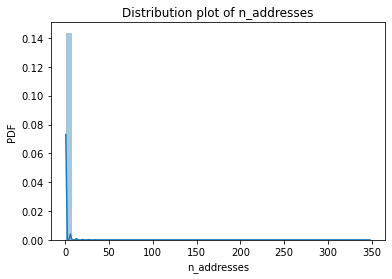

In [22]:
plt.title('Distribution plot of n_addresses')
sns.distplot(n_addresses)
plt.xlabel('n_addresses')
plt.ylabel('PDF')


#### An extremley skewed feature so we visualize only the 10th percentile

In [24]:
1+2

3